In [2]:
import pennylane as qml
import numpy as np

In [82]:
def encoding_map_repetition(wires):
    for wire in wires[1:]:
        qml.CNOT(wires=[0, wire])
    for wire in wires:
        qml.Hadamard(wires=wire)


In [83]:
def repetition_code_recovery_3(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])
    qml.Toffoli(wires=[2, 1, 0])


In [5]:
def repetition_code_recovery_5(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)
    qml.CNOT(wires=[0, 4])
    qml.CNOT(wires=[0, 3])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])

    qml.MultiControlledX(control_wires=[1, 2, 3], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 1], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 2], wires=0)
    qml.MultiControlledX(control_wires=[4, 2, 1], wires=0)
    qml.MultiControlledX(control_wires=[4, 3, 2, 1], wires=0)

In [86]:
#test for repetition code with 3 qubits

dev3_rep_circuit = qml.device("default.mixed", wires=3, shots=1000)
@qml.qnode(dev3_rep_circuit)
def circuit_3(wires, alpha):
    #initial state
    qml.Hadamard(wires=0)
    #encoding
    encoding_map_repetition(wires)
    #noise
    qml.AmplitudeDamping(alpha, wires=0)
    qml.AmplitudeDamping(alpha, wires=1)
    qml.AmplitudeDamping(alpha, wires=2)
    #decoding
    repetition_code_recovery_3(wires)
    return qml.density_matrix(wires=0)

In [38]:
print(circuit_3(dev3_rep_circuit.wires, 0.1))

[[0.5 +0.j 0.45+0.j]
 [0.45+0.j 0.5 +0.j]]


In [55]:
#test for repetition code with 5 qubits
dev5_rep_circuit = qml.device("default.mixed", wires=5)
@qml.qnode(dev5_rep_circuit)
def circuit_5(wires, alpha):
    # qml.Hadamard(wires=0)
    #encoding
    encoding_map_repetition(wires)
    #noise
    qml.AmplitudeDamping(alpha, wires=[0])
    qml.AmplitudeDamping(alpha, wires=[1])
    qml.AmplitudeDamping(alpha, wires=[2])
    qml.AmplitudeDamping(alpha, wires=[3])
    qml.AmplitudeDamping(alpha, wires=[4])
    # qml.PauliX(wires=0)
    #recovery
    repetition_code_recovery_5(wires)
    
    return qml.density_matrix(wires=0)

In [56]:
print(circuit_5(dev5_rep_circuit.wires, 0.1))

[[9.99837513e-01+0.j 5.00000000e-06+0.j]
 [5.00000000e-06+0.j 1.62487340e-04+0.j]]


In [87]:
dev_analytic = qml.device("default.mixed", wires=3, shots=1000)
@qml.qnode(dev_analytic)
def ideal_logical_zero():
    qml.Hadamard(wires=0)
    return qml.density_matrix(wires=[0])

In [88]:
gamma_list = []
fidelity_list = []

if __name__ == '__main__':
    gamma = 0
    while(gamma<=0.5):
        fid = 0
        
        for i in range(50):
            recovered_rho = circuit_3(dev3_rep_circuit.wires, gamma)
            ideal_rho = ideal_logical_zero()

            fidelity = qml.math.fidelity(recovered_rho, ideal_rho)
#             print("Fidelity after recovery:", fidelity)
    #             print("-" * 40)
            fid += fidelity
        
        gamma_list.append(gamma)
        fidelity_list.append(fid/50)

        print("gamma = ", gamma, "; avg fid = ", (fid/50), "\n")
        gamma+=0.01

c:\Users\linab\anaconda3\envs\cpen400\lib\site-packages\pennylane\devices\_qubit_device.py:686: UserWarning: Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.
  warnings.warn(


gamma =  0 ; avg fid =  1.0000000000000135 

gamma =  0.01 ; avg fid =  0.9851500104581986 

gamma =  0.02 ; avg fid =  0.9706000000000133 

gamma =  0.03 ; avg fid =  0.9563500000000141 

gamma =  0.04 ; avg fid =  0.9424000000000133 

gamma =  0.05 ; avg fid =  0.9287500000000145 

gamma =  0.060000000000000005 ; avg fid =  0.915400000000013 

gamma =  0.07 ; avg fid =  0.9023500000000128 

gamma =  0.08 ; avg fid =  0.8896000000000137 

gamma =  0.09 ; avg fid =  0.877150000000014 

gamma =  0.09999999999999999 ; avg fid =  0.8650000000000138 

gamma =  0.10999999999999999 ; avg fid =  0.8531500000000137 

gamma =  0.11999999999999998 ; avg fid =  0.8416000000000138 

gamma =  0.12999999999999998 ; avg fid =  0.8303500000000128 

gamma =  0.13999999999999999 ; avg fid =  0.8194000000000137 

gamma =  0.15 ; avg fid =  0.8087500134007066 

gamma =  0.16 ; avg fid =  0.7984000094149059 

gamma =  0.17 ; avg fid =  0.7883500000000148 

gamma =  0.18000000000000002 ; avg fid =  0.778600

In [59]:
import matplotlib.pyplot as plt

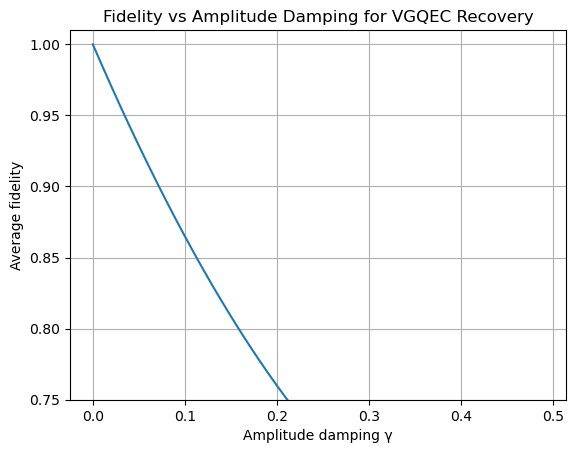

In [89]:
plt.plot(gamma_list, fidelity_list)
plt.xlabel("Amplitude damping γ")
plt.ylabel("Average fidelity")
plt.title("Fidelity vs Amplitude Damping for VGQEC Recovery")
plt.ylim(0.75, 1.01)  # set y-axis bounds
plt.grid(True)
plt.show()